In [88]:
#task b using ordinary least squares
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#%matplotlib notebook #interactable 3d plots

#functions from task description
def R2(y_data, y_model): #score function
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model): #mean square error
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

#from lecture notes on Ridge/Lasso regression
def create_X(x, y, n): #design matrices for polynomials up to 10th degree
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n+1)*(n+2)/2) # Number of elements in beta
    print(f'Features/Length beta: {l}') #what amount should we expect?
    X = np.ones((N,l))

    for i in range(1,n+1):
        q = int((i)*(i+1)/2)
        for k in range(i+1):
            X[:,q+k] = (x**(i-k))*(y**k)
    return X

In [89]:
# Making meshgrid of datapoints and compute Franke's function
n = 5 #in task b; up to 5 (this affects the approximate terrain plot)
N = 100
x = np.sort(np.random.uniform(0, 1, N))
y = np.sort(np.random.uniform(0, 1, N))

x_, y_ = np.meshgrid(x,y)

#how does the scaling affect the experiment?
var = 0.1 #variance of noise (?) 
noise = np.random.normal(0, var, len(x_)*len(x_)) 
noise = noise.reshape(len(x_), len(x_))

z = FrankeFunction(x_, y_) + noise #Franke with noise

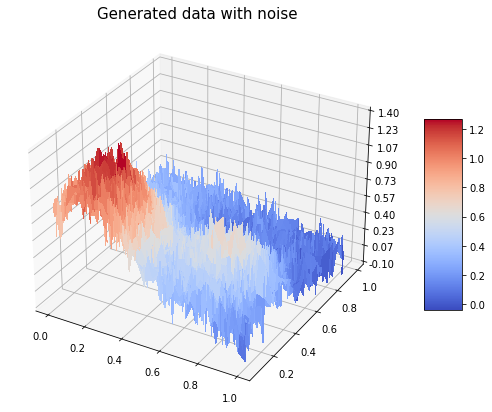

In [90]:
# Plot the surface.
fig = plt.figure(figsize = (13, 7)) 
ax = fig.add_subplot(projection='3d') #


surf = ax.plot_surface(x_, y_, z, cmap = cm.coolwarm,
linewidth = 0, antialiased = False)

ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Generated data with noise', fontsize = 15)
plt.show()

In [91]:
X = create_X(x_, y_, n)

# We split the data in test and training data, 20%
X_train, X_test, z_train, z_test = train_test_split(X, np.ravel(z), test_size=0.2)

# matrix inversion to find beta
beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ z_train
print(beta)

Features/Length beta: 21
[  0.28071041   9.02331229   4.90271249 -38.26512045 -18.36649516
 -13.39073052  51.64166781  55.64636918  22.82829166   1.46580528
 -22.84733626 -64.63393881 -13.70467514 -30.1816402   20.4289379
   0.11150269  22.20234007  14.42092814  -4.83676605  16.87538867
 -13.50943461]


In [92]:
#scikit 
linreg = LinearRegression()
linreg.fit(X, np.ravel(z))

zmatrix = linreg.predict(X)

# and then make the prediction
ztilde = X_train @ beta
print("Training R2")
print(R2(z_train, ztilde))
print("Training MSE")
print(MSE(z_train, ztilde))

zpredict = X_test @ beta
print("Test R2")
print(R2(z_test, zpredict))
print("Test MSE")
print(MSE(z_test, zpredict))

Training R2
0.8745055734800589
Training MSE
0.011684885324053106
Test R2
0.8813251919392966
Test MSE
0.01080678600731144


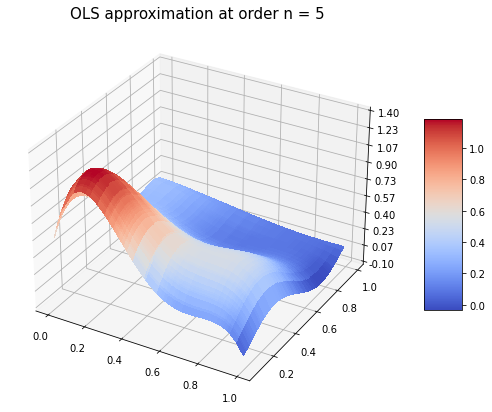

In [93]:
z_matrix = zmatrix.reshape((N, N))

# Plot the surface.
fig = plt.figure(figsize = (13, 7))
ax = fig.add_subplot(projection='3d') #


surf = ax.plot_surface(x_, y_, z_matrix, cmap = cm.coolwarm,
linewidth = 0, antialiased = False)

#predict_surf = ax.plot_trisurf(x, y, zpredict, cmap = cm.coolwarm,
#linewidth = 0, antialiased = False)
# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title(f'OLS approximation at order n = {n}', fontsize = 15)
plt.show()

In [94]:
#MSE and R2 as function of polynomial degree n
#something is wrong in this block (see plots); R2 should decicively increase with increased n (and be between 0 and 1).

MSE_train = np.zeros(n)
R2_train = np.zeros(n)
MSE_test = np.zeros(n)
R2_test = np.zeros(n)
var_B_train = np.zeros(n)
var_B_test = np.zeros(n)
N_ = np.array([b+1 for b in range(n)])
for i in range(0, n): #variables marked to avoid confusion with older
    X_ = create_X(x_, y_, i+1)
    X_train_, X_test_, z_train_, z_test_ = train_test_split(X_, np.ravel(z), test_size=0.2)
    beta_ = np.linalg.inv(X_train_.T @ X_train_) @ X_train_.T @ z_train_
    linreg_ = LinearRegression()
    linreg_.fit(X_, np.ravel(z))
    ztilde_ = X_train_ @ beta_
    zpredict_ = X_test_ @ beta_
    MSE_train[i] = (MSE(z_train_, ztilde_))
    R2_train[i] = (R2(z_train_, ztilde_))
    MSE_test[i] = (MSE(z_test_, zpredict_))
    R2_test[i] = (R2(z_test_, zpredict_))
    #something's wrong here, (X^T X)^-1 does not become a scalar
    #var_B_train.append(var*np.linalg.inv(X_train_.T @ X_train_)) #from task a
    #var_B_test.append(var*np.linalg.inv(X_test_.T @ X_test_))
    var_B_train[i] = (np.var(beta_)) #is this sufficient?

Features/Length beta: 3
Features/Length beta: 6
Features/Length beta: 10
Features/Length beta: 15
Features/Length beta: 21


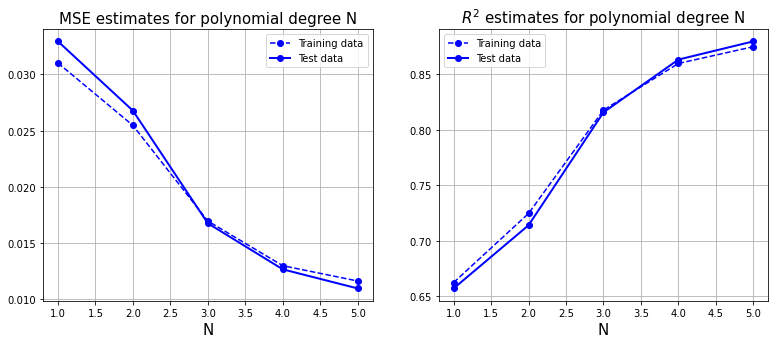

In [95]:
#plotting MSE and R2 as function of polynomial degree
fig = plt.figure(figsize = (13, 5)) 
plt.subplot(1, 2, 1)
plt.title('MSE estimates for polynomial degree N', fontsize = 15)
plt.plot(N_, MSE_train, 'b--', marker = 'o', label = 'Training data')
plt.plot(N_, MSE_test, 'b', marker = 'o', label = 'Test data', linewidth = 2)
plt.xlabel('N', fontsize = 15)
plt.grid(1); plt.legend()

plt.subplot(1, 2, 2)
plt.title('$R^2$ estimates for polynomial degree N', fontsize = 15)
plt.plot(N_, R2_train, 'b--', marker = 'o', label = 'Training data')
plt.plot(N_, R2_test, 'b', marker = 'o', label = 'Test data', linewidth = 2)
plt.xlabel('N', fontsize = 15)
plt.grid(1); plt.legend(); plt.show()

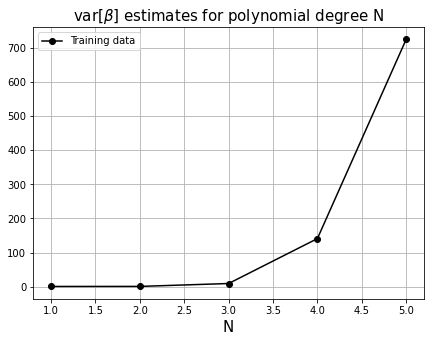

Variance of betas for n = 1 to 5: [0.6129, 0.7323, 9.23, 140.9, 725.0]


In [96]:
#plotting var(beta) as function of polynomial degree

fig = plt.figure(figsize = (7, 5))
plt.title('var[$\\beta$] estimates for polynomial degree N', fontsize = 15)
plt.plot(N_, var_B_train, 'k', marker = 'o', label = 'Training data')
#plt.plot(N_, var_B_test, 'b', marker = 'o', label = 'Test data', linewidth = 2)
plt.xlabel('N', fontsize = 15)
plt.grid(1); plt.legend(); plt.show()

varb = [eval(f'{v:.4}') for v in var_B_train]
print(f'Variance of betas for n = 1 to 5: {varb}')

Are these values reasonable? Considering that the amount of beta-values/features increase with polynomial degree (more parameters to adjust) it is expected that the variance increases, but what do these values tell us?

In [97]:
#task c